# Uma preve Analise dos dados apresentados

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('dados_geral.csv')
df

## Tratamento

In [70]:

##DROP de colunas desnecessarias 

df.drop(['Datetime', 'Dividends','Stock Splits','Volume','Date','Adj Close'], axis=1, inplace = True)

In [74]:
#Replace 
df.replace({'Ticket': {'AMER3': 'Lojas Americanas', 'ASAI3': 'Assaí', 'CRFB3': 'Carrefour', 'MGLU3': 'Magazine Luiza'}}, inplace=True)


In [72]:
# convertendo a coluna Data em tipo data
df['Data'] = pd.to_datetime(df['Data'])

In [75]:
df

,Open,High,Low,Close,Ticket,Data,Hora
0,9.85,9.98,9.56,9.95,Lojas Americanas,2022-12-02,10:00:00
1,9.94,10.20,9.93,10.19,Lojas Americanas,2022-12-02,11:00:00
2,10.18,10.23,9.90,9.93,Lojas Americanas,2022-12-02,12:00:00
3,9.93,9.93,9.77,9.82,Lojas Americanas,2022-12-02,13:00:00
4,9.82,9.90,9.70,9.76,Lojas Americanas,2022-12-02,14:00:00
...,...,...,...,...,...,...,...
3804,4.54,4.54,4.46,4.51,Magazine Luiza,2022-08-30,13:00:00
3805,4.52,4.52,4.34,4.42,Magazine Luiza,2022-08-30,14:00:00
3806,4.42,4.48,4.41,4.47,Magazine Luiza,2022-08-30,15:00:00
3807,4.48,4.56,4.45,4.49,Magazine Luiza,2022-08-30,16:00:00


In [76]:
def weighted_average(df, values, weights):
    """
    Calcula a média ponderada de uma coluna do DataFrame.
    """
    return (df[values] * df[weights]).sum() / df[weights].sum()

# Agrupar os dados por dia e por ticket e calcular a média ponderada
df_media = df.groupby(['Ticket', 'Data']).apply(
    lambda x: pd.Series({
        'Open': weighted_average(x, 'Open', 'Close'),
        'High': weighted_average(x, 'High', 'Close'),
        'Low': weighted_average(x, 'Low', 'Close'),
        'Close': x['Close'].mean()
    })
).reset_index()

             Ticket       Data       Open       High        Low      Close
0             Assaí 2022-08-01  15.710448  15.813674  15.613232  15.712500
1             Assaí 2022-08-02  15.569237  15.646924  15.486900  15.566250
2             Assaí 2022-08-03  16.169078  16.328530  16.110479  16.268750
3             Assaí 2022-08-04  16.738657  16.861513  16.657712  16.750000
4             Assaí 2022-08-05  17.001279  17.082622  16.920012  17.021250
..              ...        ...        ...        ...        ...        ...
510  Magazine Luiza 2023-01-27   4.415202   4.479441   4.388184   4.445714
511  Magazine Luiza 2023-01-30   4.547223   4.585966   4.487340   4.532857
512  Magazine Luiza 2023-01-31   4.372843   4.424444   4.340108   4.381429
513  Magazine Luiza 2023-02-01   4.291758   4.314608   4.224608   4.265714
514  Magazine Luiza 2023-02-02   4.412792   4.481844   4.365622   4.431429

[515 rows x 6 columns]


## Plotagem

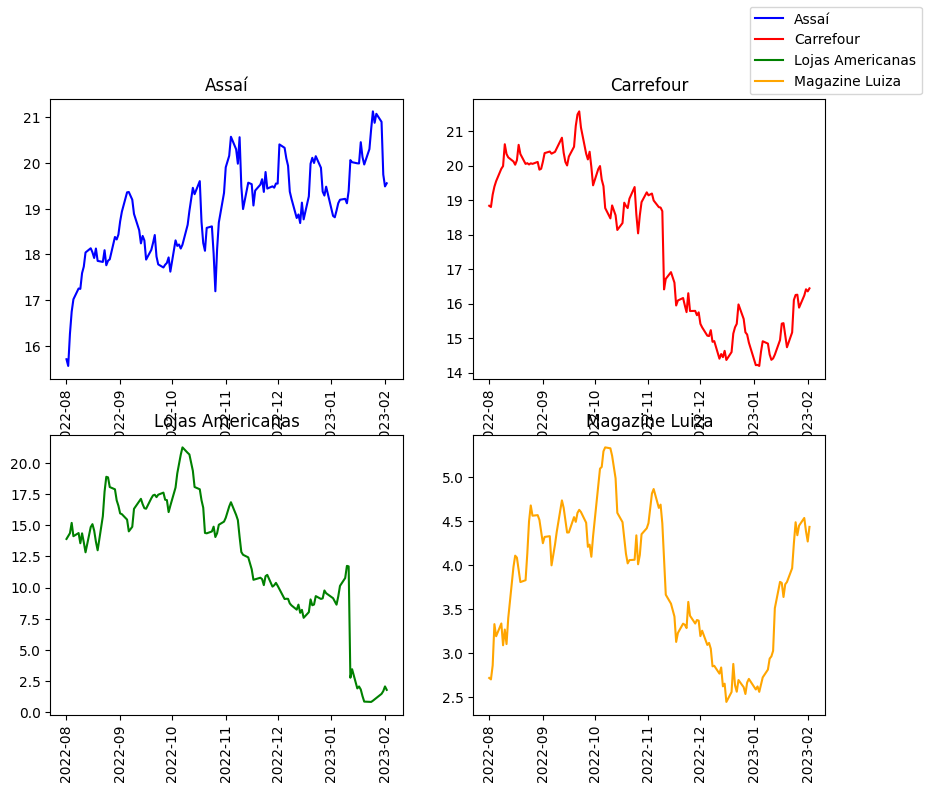

In [79]:
# Criar lista de cores
cores = ['blue', 'red', 'green', 'orange']

# Agrupar os dados por 'Ticket'
grupos = df_media.groupby('Ticket')

# Definir o número de plots e as janelas de plotagem
n_plots = 4  # número de plots que deseja gerar
fig, janela = plt.subplots(2, 2, figsize=(10, 8))

# Gerar um gráfico para cada grupo de dados
for i, (ticket, grupo) in enumerate(grupos):
    # Calcular a linha média
    linha_media = grupo.groupby('Data')['Close'].mean()
    
    # Determinar o índice da linha e da coluna para o plot atual
    j = i % 2
    k = i // 2
    
    # Verificar se o índice está dentro dos limites da matriz 'janela'
    if k < janela.shape[0] and j < janela.shape[1]:
        # Definir a rotação dos rótulos do eixo x
        janela[k, j].tick_params(axis='x', rotation=90)
        
        # Gerar o plot
        janela[k, j].plot(linha_media.index, linha_media.values, color=cores[i])
        janela[k, j].set_title(ticket)

# Adicionar a legenda
fig.legend(grupos.groups.keys())

# Mostrar o plot
plt.show()


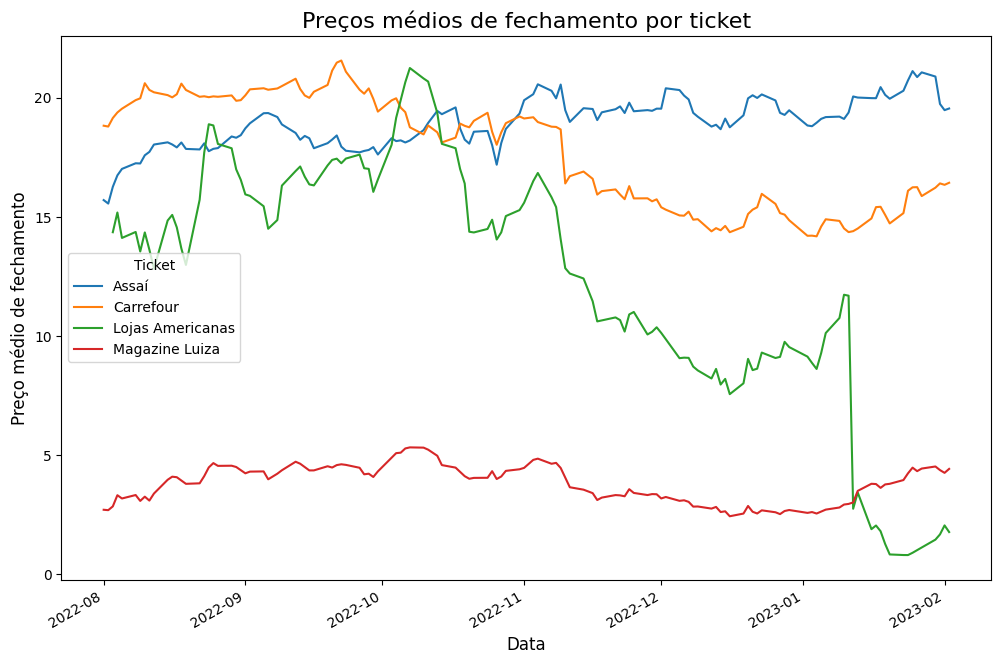

In [80]:
# Agrupar os dados por 'Ticket' e 'Data'
grupos = df_media.groupby(['Ticket', 'Data'])['Close'].mean()

# Reorganizar os dados em uma tabela pivô
tabela_pivo = pd.pivot_table(df_media, values='Close', index='Data', columns='Ticket')

# Gerar o gráfico com as linhas correspondentes a cada ticket
ax = tabela_pivo.plot(figsize=(12,8))

# Definir o título e os rótulos dos eixos
ax.set_title('Preços médios de fechamento por ticket', fontsize=16)
ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Preço médio de fechamento', fontsize=12)

# Mostrar o gráfico
plt.show()
